# 2. Projekat iz predmeta Mašinsko učenje

Credit Card Customer Segmentation Data:
https://www.kaggle.com/datasets/busraatasoy/credit-card-customer-segmentation-data

Marija Cvetković 1940

Luka Kocić 2022

In [1]:
import pandas as pd

df = pd.read_csv("customer-segmentation.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
df.drop(columns=["customer_id"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [4]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [5]:
df.isnull().sum()

age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
df.nunique()

age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6205
total_trans_amount          5033
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

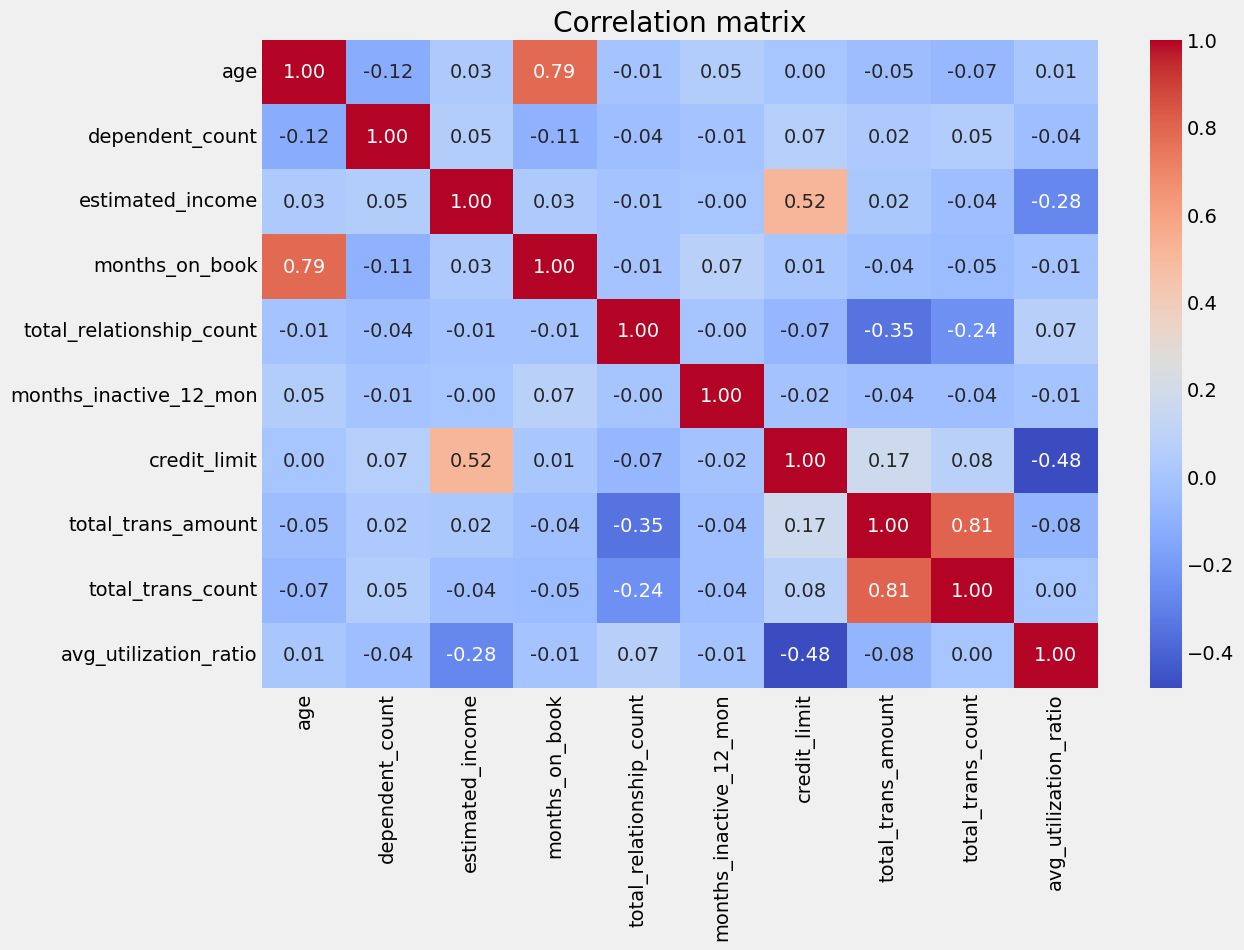

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X = df.copy()

gender_col = ['gender']
education_col = ['education_level']
marital_col = ['marital_status']

num_c=num_cols = X.drop(columns=gender_col + education_col + marital_col).columns

num_cols = X.drop(columns=gender_col + education_col + marital_col).columns.tolist()
X_num = X[num_cols].to_numpy(dtype=float)

gender_encoder = OrdinalEncoder(categories=[["M", "F"]])
education_encoder = OrdinalEncoder(categories=[[
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate"
]])
marital_encoder = OneHotEncoder(sparse_output=False)

X_gender = gender_encoder.fit_transform(X[gender_col])
X_education = education_encoder.fit_transform(X[education_col])
X_marital = marital_encoder.fit_transform(X[marital_col])

gender_feature_names = ["gender"]
education_feature_names = ["education_level"]
marital_feature_names = marital_encoder.get_feature_names_out(marital_col).tolist()

all_columns = (
    num_cols
    + gender_feature_names
    + education_feature_names
    + marital_feature_names
)

X_encoded = np.hstack([X_num, X_gender, X_education, X_marital])

df = pd.DataFrame(X_encoded, columns=all_columns)

encoded_cols = (
    gender_feature_names
    + education_feature_names
    + marital_feature_names
)

print(df[encoded_cols].head())


   gender  education_level  marital_status_Divorced  marital_status_Married  \
0     1.0              0.0                      0.0                     0.0   
1     0.0              0.0                      0.0                     0.0   
2     1.0              3.0                      1.0                     0.0   
3     0.0              5.0                      1.0                     0.0   
4     0.0              0.0                      0.0                     0.0   

   marital_status_Single  marital_status_Unknown  
0                    1.0                     0.0  
1                    1.0                     0.0  
2                    0.0                     0.0  
3                    0.0                     0.0  
4                    1.0                     0.0  


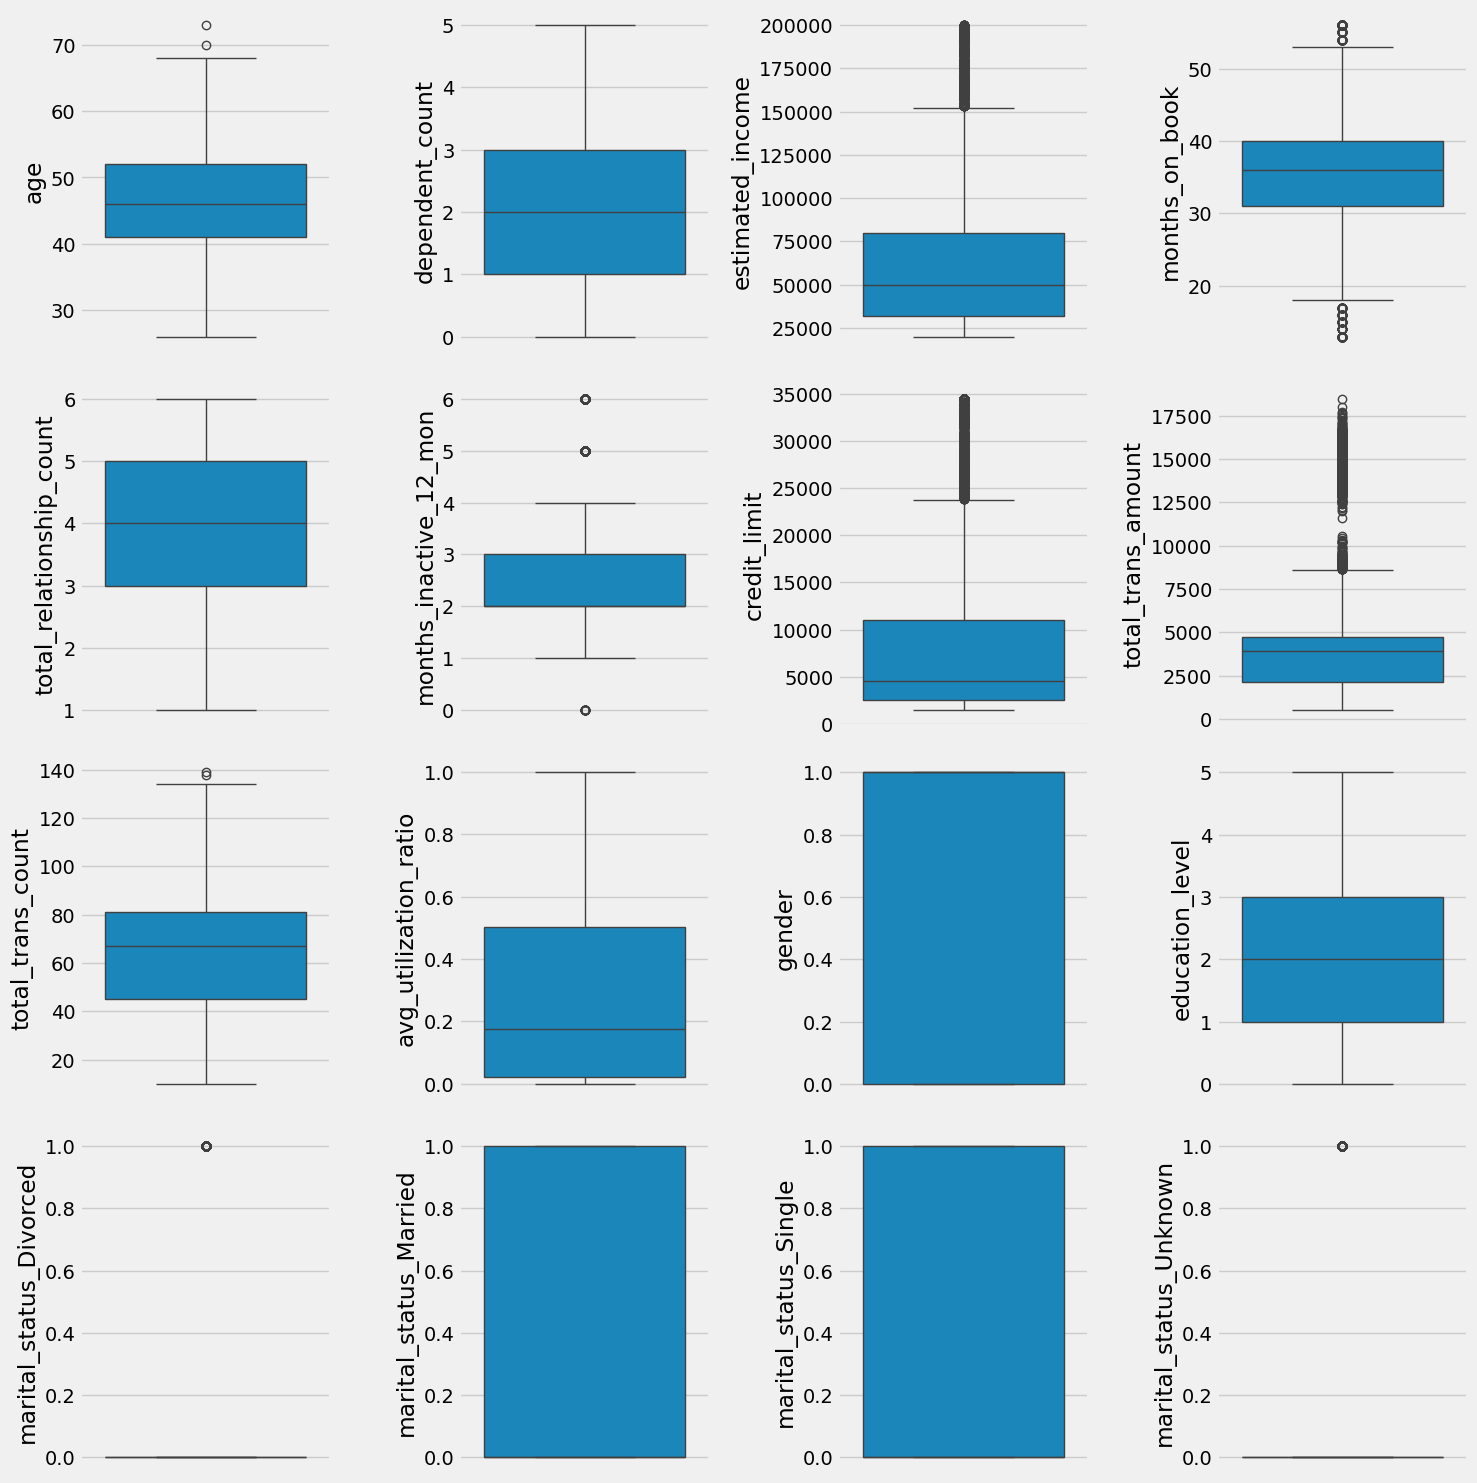

In [74]:
fig = plt.figure(figsize=(15,30))
for i in range(len(df.columns)):
    fig.add_subplot(8,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:

        
iqr_mask = pd.Series(False, index=df.index)
zscore_mask = pd.Series(False, index=df.index)

for column in num_c:
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    donja = Q1 - 1.5 * IQR
    gornja = Q3 + 1.5 * IQR

    iqr_mask |= (df[column] < donja) | (df[column] > gornja)

    # Z-score
    std = df[column].std()
    if std != 0:
        z = (df[column] - df[column].mean()) / std
        zscore_mask |= (z > 3) | (z < -3)

print(f"Broj redova sa bar jednim IQR outlierom: {iqr_mask.sum()}")
print(f"Broj redova sa bar jednim Z-score outlierom: {zscore_mask.sum()}")

# Da li je pametno ukloniti outliere? Ima ih skoro 700 na 10 000 redova?

Broj redova sa bar jednim IQR outlierom: 2500
Broj redova sa bar jednim Z-score outlierom: 691


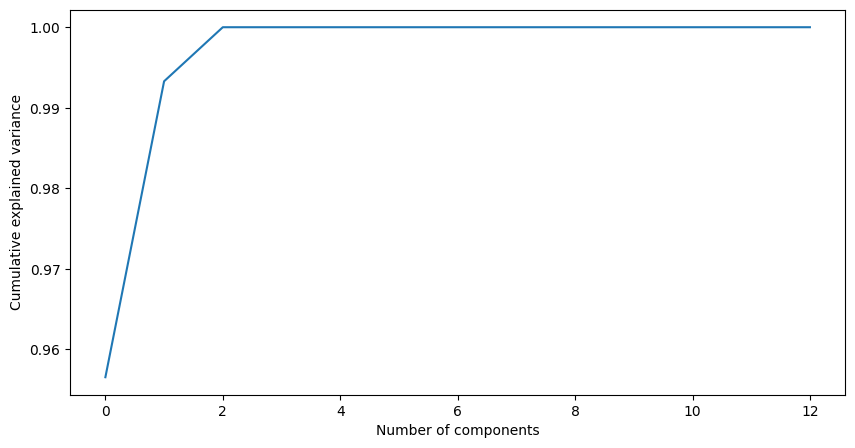

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(df)
# data_pca = pca.transform(df)
# plt.figure(figsize=(10, 5))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.show()

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(df)
# data_pca = pca.transform(df)
# plt.figure(figsize=(10, 5))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.show()

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df)


## Klasterizacija

### K-Means

          variant  before_best_k  before_best_sil  before_elbow_k  \
0      No scaling              2         0.628148               3   
1    MinMaxScaler              6         0.309690               5   
2    RobustScaler              2         0.299954               4   
3  StandardScaler              5         0.159889               5   

   after_best_k  after_best_sil  after_elbow_k  pca_n_components  \
0             2        0.664047              3                 1   
1             6        0.347351              5                10   
2             2        0.322400              4                 9   
3             4        0.188270              6                11   

   pca_explained_var  
0           0.956523  
1           0.931344  
2           0.909844  
3           0.924012  


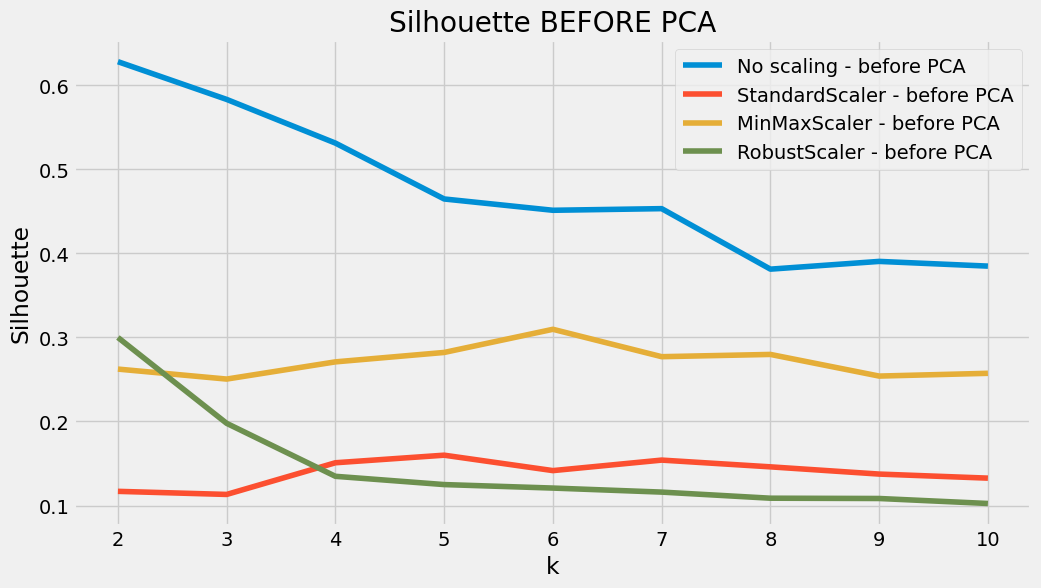

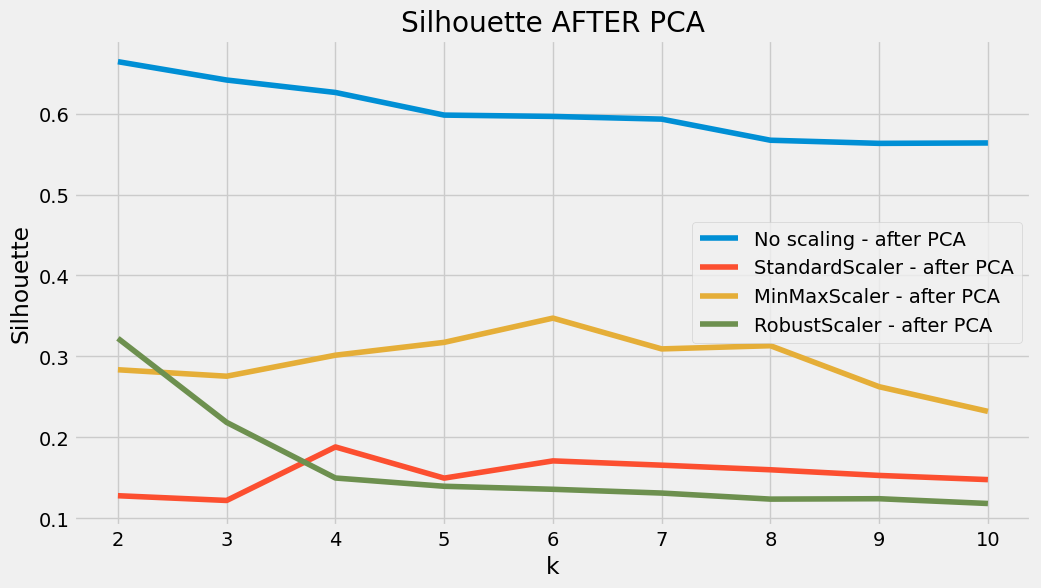

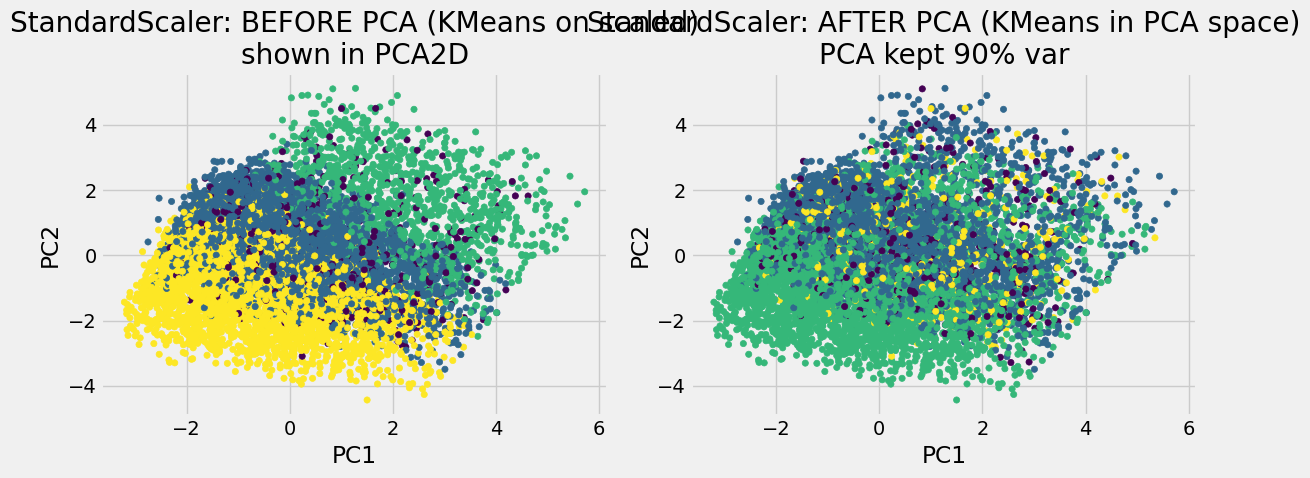

In [ ]:


# 2) Elbow + Silhouette za svaku varijantu
# ----------------------------
# =========================================================
# 2) KMEANS EVALUACIJA (FIXED - bez sil[k] indeksiranja)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kneed import KneeLocator
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

def evaluate_kmeans(X_mat, k_list):
    sse = []
    sil = []

    for k in k_list:
        km = KMeans(n_clusters=k, **kmeans_kwargs)
        labels = km.fit_predict(X_mat)
        sse.append(km.inertia_)

        if k >= 2:
            sil.append(silhouette_score(X_mat, labels))
        else:
            sil.append(None)

    kl = KneeLocator(k_list, sse, curve="convex", direction="decreasing")
    elbow_k = kl.elbow

    sil_pairs = [(k, s) for k, s in zip(k_list, sil) if s is not None]
    best_sil_k, best_sil = max(sil_pairs, key=lambda x: x[1])

    return sse, sil, elbow_k, best_sil_k, best_sil


# =========================================================
# 3) POREĐENJE PRE PCA vs POSLE PCA za sve skalere
# =========================================================
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

K = list(range(1, 11))
K2 = [k for k in K if k >= 2]

PCA_KEEP = 0.90  # zadrži 90% varijanse

results = {}
rows = []

for name, scaler in scalers.items():
    X0 = df.to_numpy(dtype=float)
    X_scaled = X0 if scaler is None else scaler.fit_transform(X0)

    # PRE PCA
    sse_b, sil_b, elbow_b, bestk_b, bestsil_b = evaluate_kmeans(X_scaled, K)

    # POSLE PCA (KMeans u PCA prostoru)
    pca_full = PCA(n_components=PCA_KEEP, random_state=42)
    X_pca_full = pca_full.fit_transform(X_scaled)

    sse_a, sil_a, elbow_a, bestk_a, bestsil_a = evaluate_kmeans(X_pca_full, K)

    results[name] = {
        "X_scaled": X_scaled,
        "X_pca_full": X_pca_full,
        "sse_before": sse_b,
        "sil_before": sil_b,
        "elbow_before": elbow_b,
        "bestk_before": bestk_b,
        "bestsil_before": bestsil_b,
        "sse_after": sse_a,
        "sil_after": sil_a,
        "elbow_after": elbow_a,
        "bestk_after": bestk_a,
        "bestsil_after": bestsil_a,
        "pca_components": X_pca_full.shape[1],
        "pca_explained": float(np.sum(pca_full.explained_variance_ratio_))
    }

    rows.append({
        "variant": name,
        "before_best_k": int(bestk_b),
        "before_best_sil": float(bestsil_b),
        "before_elbow_k": None if elbow_b is None else int(elbow_b),
        "after_best_k": int(bestk_a),
        "after_best_sil": float(bestsil_a),
        "after_elbow_k": None if elbow_a is None else int(elbow_a),
        "pca_n_components": int(X_pca_full.shape[1]),
        "pca_explained_var": results[name]["pca_explained"],
    })

summary = pd.DataFrame(rows).sort_values(by="after_best_sil", ascending=False).reset_index(drop=True)
print(summary)


# =========================================================
# 4) Plot silhouette BEFORE vs AFTER (za sve skalere)
# =========================================================
plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_before"]) if k >= 2]
    plt.plot(K2, sil_vals, label=f"{name} - before PCA")
plt.xticks(K2)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette BEFORE PCA")
plt.legend()
plt.show()

plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_after"]) if k >= 2]
    plt.plot(K2, sil_vals, label=f"{name} - after PCA")
plt.xticks(K2)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette AFTER PCA")
plt.legend()
plt.show()


# =========================================================
# 5) Vizualno: BEFORE vs AFTER PCA scatter (jedna varijanta)
# =========================================================
def plot_before_after(variant_name, k=None):
    X_scaled = results[variant_name]["X_scaled"]
    X_pca_full = results[variant_name]["X_pca_full"]

    # ako ne daš k, uzmi najbolji posle PCA
    if k is None:
        k = results[variant_name]["bestk_after"]

    # PRE: KMeans na original (scaled) prostoru, ali prikaz u PCA 2D
    km_before = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_before = km_before.fit_predict(X_scaled)
    X_plot_before = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

    # POSLE: KMeans u PCA prostoru (koji već imamo), prikaz prve 2 komponente
    km_after = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_after = km_after.fit_predict(X_pca_full)
    X_plot_after = X_pca_full[:, :2] if X_pca_full.shape[1] >= 2 else np.hstack([X_pca_full, np.zeros((X_pca_full.shape[0], 1))])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_plot_before[:, 0], X_plot_before[:, 1], c=labels_before, s=20, cmap="viridis")
    plt.title(f"{variant_name}: BEFORE PCA (KMeans on scaled)\nshown in PCA2D")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    plt.subplot(1, 2, 2)
    plt.scatter(X_plot_after[:, 0], X_plot_after[:, 1], c=labels_after, s=20, cmap="viridis")
    plt.title(f"{variant_name}: AFTER PCA (KMeans in PCA space)\nPCA kept {PCA_KEEP*100:.0f}% var")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()


# Prikaz za StandardScaler (promijeni po želji)
plot_before_after("StandardScaler")

In [ ]:


# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df.describe()

# from sklearn.cluster import KMeans

# kmeans_kwargs = {
#      "init": "random",
#      "n_init": 10,
#      "max_iter": 300,
#      "random_state": 42,
#  }

# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(df)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()


# from kneed import KneeLocator

# kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
# kl.elbow

np.int64(4)


=== SUMMARY (sorted by best silhouette) ===
          variant  elbow_k  best_silhouette_k  best_silhouette_score
0      No scaling        3                  2               0.628148
1    MinMaxScaler        5                  6               0.309690
2    RobustScaler        4                  2               0.299954
3  StandardScaler        5                  5               0.159889


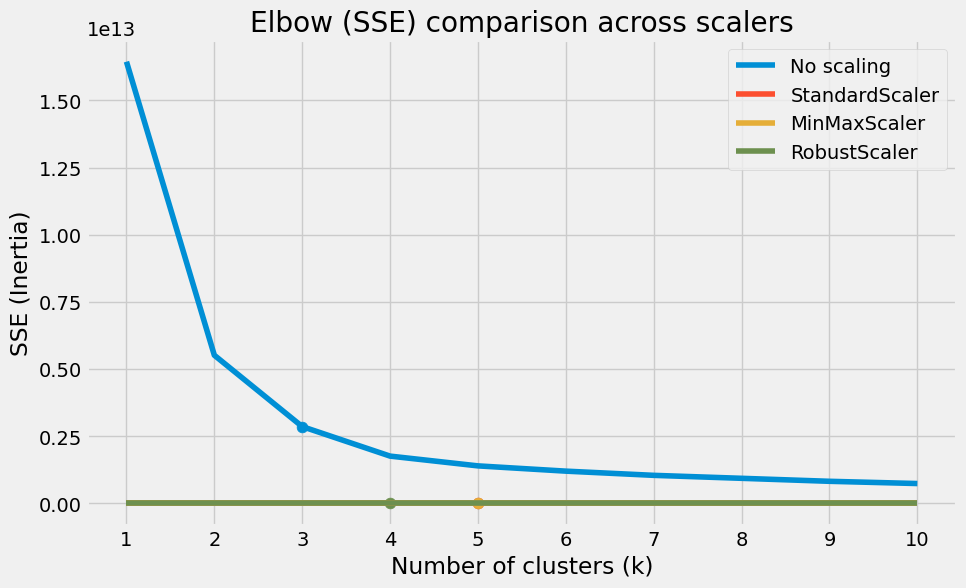

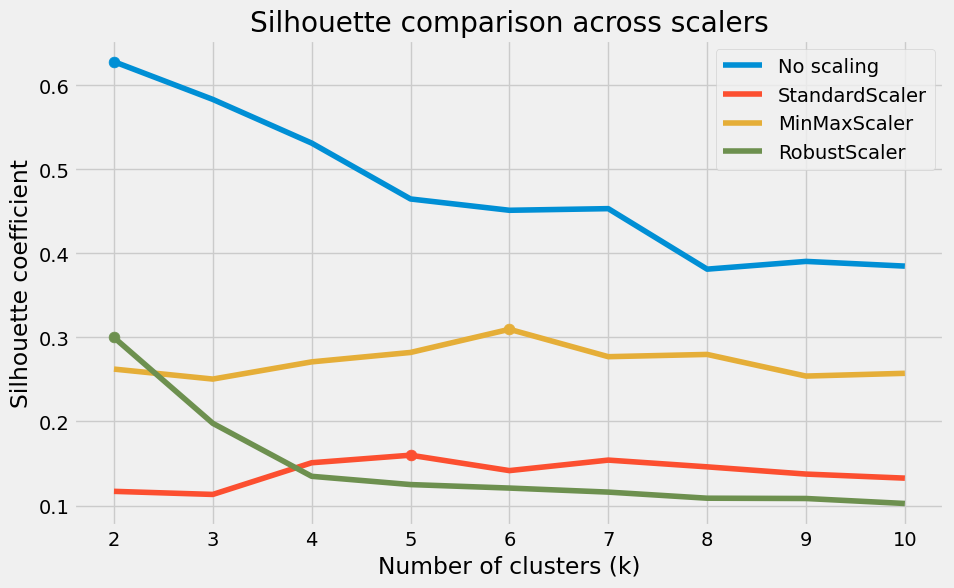


=== BEST METHOD (by silhouette) ===
Best variant: No scaling
Best k: 2
Best silhouette: 0.6281483802091617


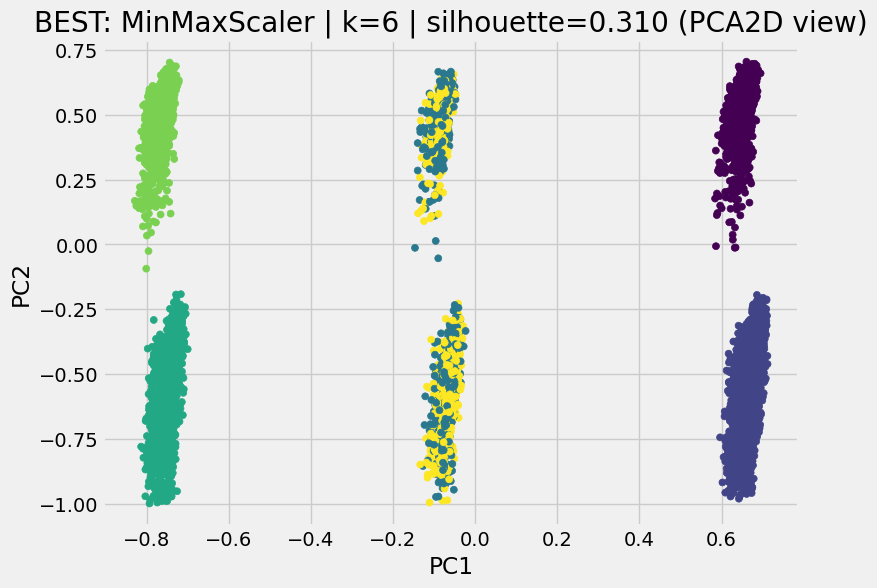

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kneed import KneeLocator


# =========================
# 0) PARAMETRI
# =========================
K = list(range(1, 11))          # za SSE/elbow
K2 = list(range(2, 11))         # za silhouette (k>=2)

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

# Varijante skaliranja
scalers = {
    "No scaling": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}


# =========================
# 1) FUNKCIJE
# =========================
def prepare_X(df, scaler):
    X = df.to_numpy(dtype=float)
    if scaler is None:
        return X
    return scaler.fit_transform(X)

def evaluate_kmeans(X_mat, k_list):
    """
    Vraća:
      sse: inertia po k (isti red kao k_list)
      sil: silhouette po k (None za k<2)
      elbow_k: elbow po KneeLocator (može biti None)
      best_sil_k: k sa max silhouette
      best_sil: max silhouette score
    """
    sse = []
    sil = []

    for k in k_list:
        km = KMeans(n_clusters=k, **kmeans_kwargs)
        labels = km.fit_predict(X_mat)
        sse.append(km.inertia_)

        if k >= 2:
            sil.append(silhouette_score(X_mat, labels))
        else:
            sil.append(None)

    # Elbow (automatski)
    kl = KneeLocator(k_list, sse, curve="convex", direction="decreasing")
    elbow_k = kl.elbow

    # Best silhouette
    sil_pairs = [(k, s) for k, s in zip(k_list, sil) if s is not None]
    best_sil_k, best_sil = max(sil_pairs, key=lambda x: x[1])

    return sse, sil, elbow_k, best_sil_k, best_sil

def plot_elbow_all(results, title):
    plt.figure(figsize=(10, 6))
    for name, res in results.items():
        plt.plot(K, res["sse"], label=name)
        if res["elbow_k"] is not None:
            plt.scatter([res["elbow_k"]], [res["sse"][K.index(res["elbow_k"])]], s=60)
    plt.xticks(K)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("SSE (Inertia)")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_silhouette_all(results, title):
    plt.figure(figsize=(10, 6))
    for name, res in results.items():
        sil_vals = [s for k, s in zip(K, res["sil"]) if k >= 2]
        plt.plot(K2, sil_vals, label=name)
        # označi best silhouette k
        plt.scatter([res["best_sil_k"]], [res["best_sil"]], s=60)
    plt.xticks(K2)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette coefficient")
    plt.title(title)
    plt.legend()
    plt.show()


# =========================
# 2) POREĐENJE (ELBOW + SILHOUETTE) ZA SVE VARIJANTE
# =========================
results = {}
rows = []

for name, scaler in scalers.items():
    X_proc = prepare_X(df, scaler)

    sse, sil, elbow_k, best_sil_k, best_sil = evaluate_kmeans(X_proc, K)

    results[name] = {
        "X_proc": X_proc,
        "sse": sse,
        "sil": sil,
        "elbow_k": elbow_k,
        "best_sil_k": best_sil_k,
        "best_sil": best_sil
    }

    rows.append({
        "variant": name,
        "elbow_k": None if elbow_k is None else int(elbow_k),
        "best_silhouette_k": int(best_sil_k),
        "best_silhouette_score": float(best_sil)
    })

summary = pd.DataFrame(rows).sort_values("best_silhouette_score", ascending=False).reset_index(drop=True)
print("\n=== SUMMARY (sorted by best silhouette) ===")
print(summary)


# =========================
# 3) PLOTOVI: ELBOW i SILHOUETTE (za sve skalere + bez)
# =========================
plot_elbow_all(results, "Elbow (SSE) comparison across scalers")
plot_silhouette_all(results, "Silhouette comparison across scalers")


# =========================
# 4) IZBOR “NAJBOLJE METODE”
#    (po najvećem silhouette score)
# =========================
best_variant = summary.loc[0, "variant"]
best_k = int(summary.loc[0, "best_silhouette_k"])
best_score = float(summary.loc[0, "best_silhouette_score"])

print("\n=== BEST METHOD (by silhouette) ===")
print("Best variant:", best_variant)
print("Best k:", best_k)
print("Best silhouette:", best_score)

# (opciono) ako želiš da forsiraš da ne bira "No scaling":
if best_variant == "No scaling":
    summary2 = summary[summary["variant"] != "No scaling"].reset_index(drop=True)
    best_variant = summary2.loc[0, "variant"]
    best_k = int(summary2.loc[0, "best_silhouette_k"])
    best_score = float(summary2.loc[0, "best_silhouette_score"])


# =========================
# 5) FINALNI PRIKAZ KLASTERA (PCA 2D) ZA NAJBOLJU VARIJANTU
# =========================
X_best = results[best_variant]["X_proc"]

final_km = KMeans(n_clusters=best_k, **kmeans_kwargs)
labels = final_km.fit_predict(X_best)

pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_best)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels, s=25, cmap="viridis")
plt.title(f"BEST: {best_variant} | k={best_k} | silhouette={best_score:.3f} (PCA2D view)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


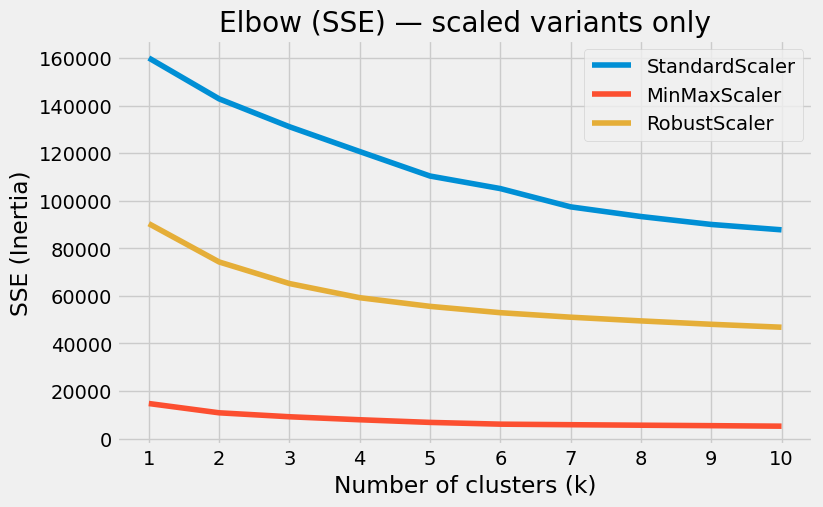

In [87]:
plt.figure(figsize=(8, 5))

for name in ["StandardScaler", "MinMaxScaler", "RobustScaler"]:
    plt.plot(K, results[name]["sse"], label=name)

plt.xticks(K)
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow (SSE) — scaled variants only")
plt.legend()
plt.show()


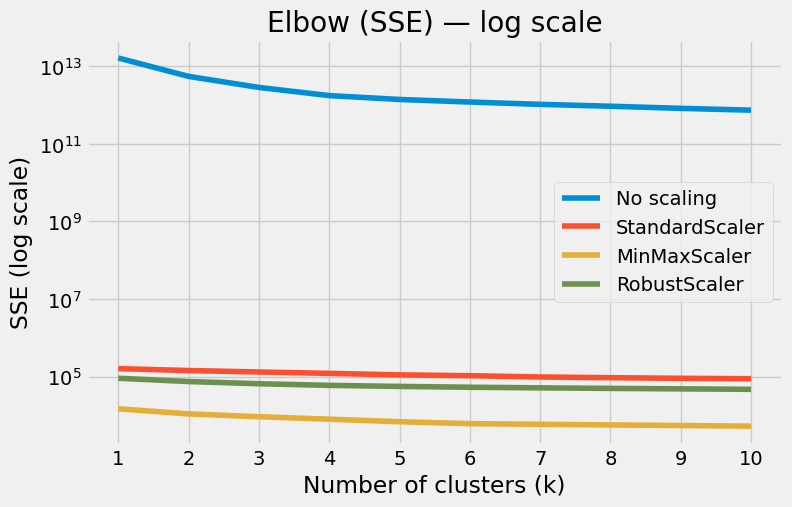

In [88]:
plt.figure(figsize=(8, 5))

for name, res in results.items():
    plt.plot(K, res["sse"], label=name)

plt.yscale("log")
plt.xticks(K)
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (log scale)")
plt.title("Elbow (SSE) — log scale")
plt.legend()
plt.show()


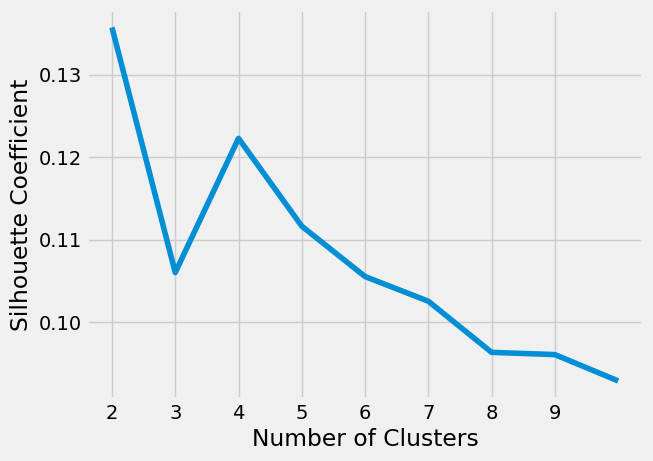

In [ ]:


# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df.describe()

# from sklearn.cluster import KMeans

# kmeans_kwargs = {
#      "init": "random",
#      "n_init": 10,
#      "max_iter": 300,
#      "random_state": 42,
#  }

# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(df)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()


# from kneed import KneeLocator

# kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
# kl.elbow



# from sklearn.metrics import silhouette_score

# silhouette_coefficients = []

# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k,  random_state=42)
#     kmeans.fit(df)
#     score = silhouette_score(df, kmeans.labels_)
#     silhouette_coefficients.append(score)

# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 10))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

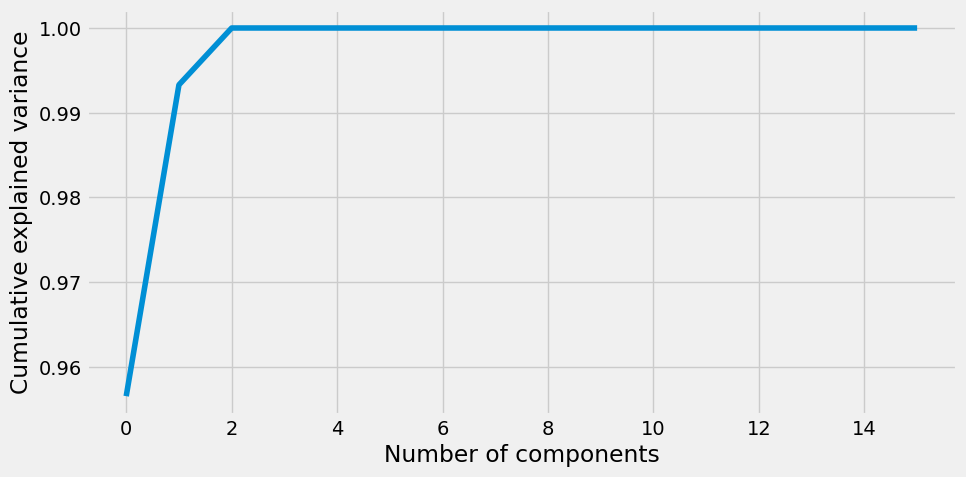

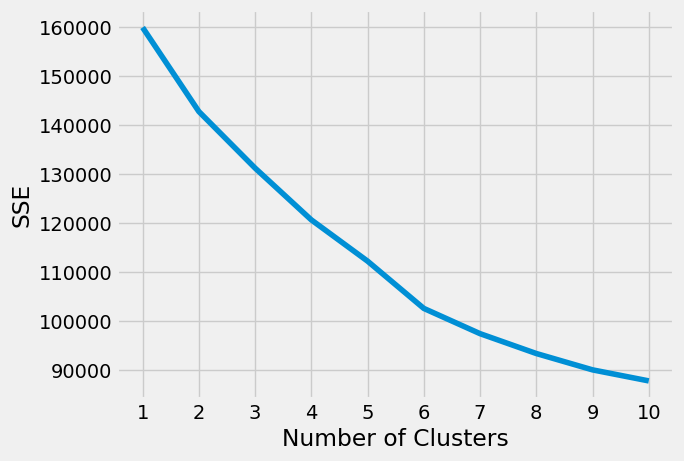

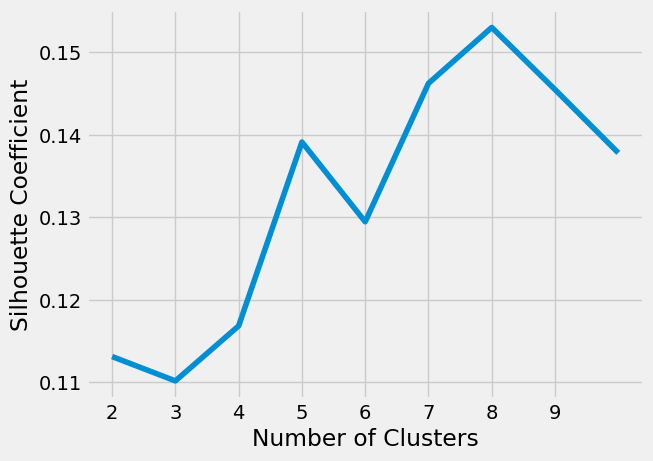

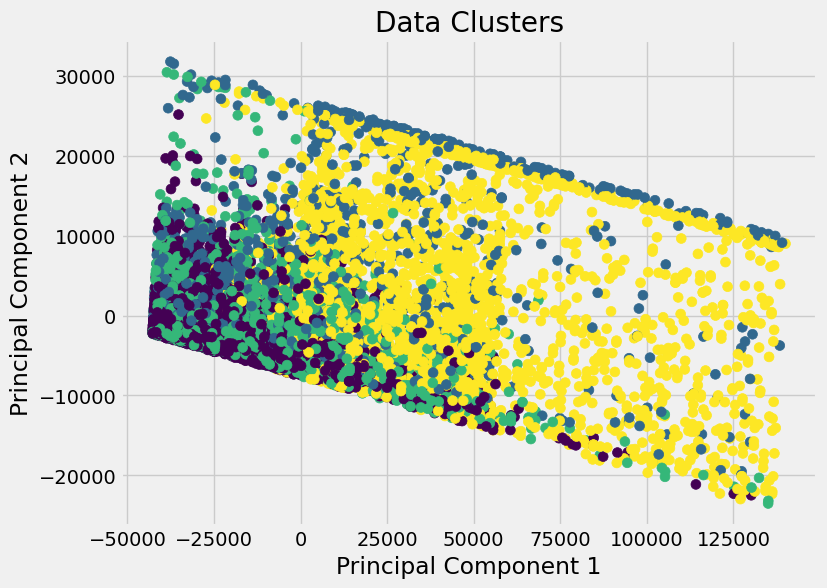

In [ ]:
from sklearn.decomposition import PCA
# ///lukino
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

from sklearn.cluster import KMeans

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow



from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Agglomerative Clustering

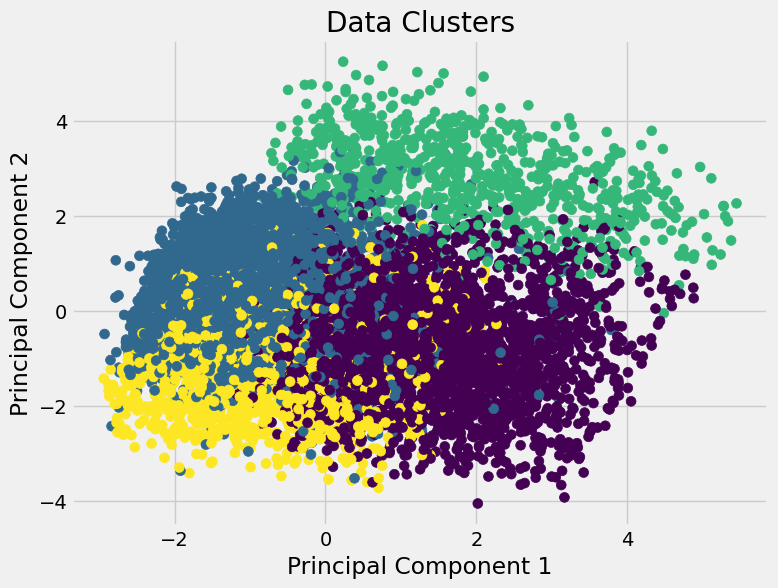

In [25]:
# Agglomerative Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative_clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_clusters, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

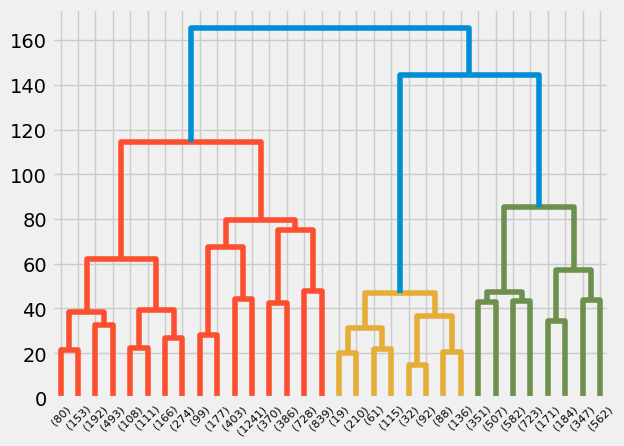

In [26]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

## DBSCAN

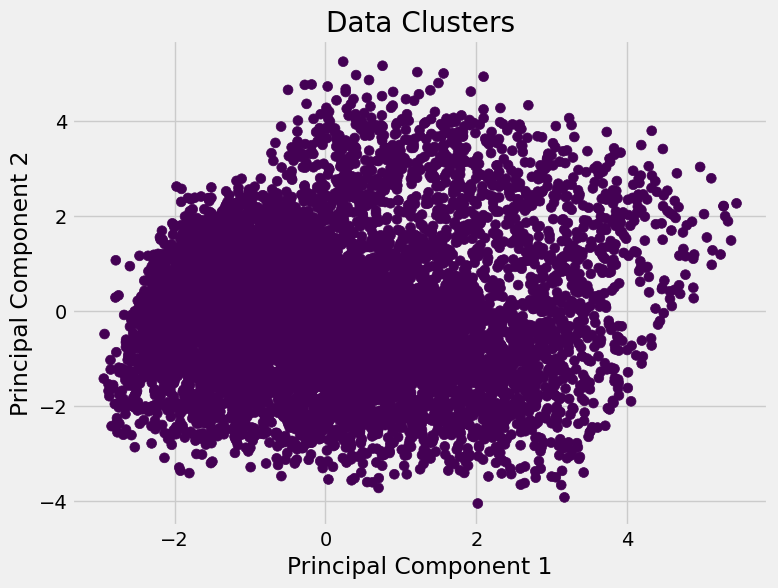

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()